# Lab Session #2
## Computational Neurophysiology [E010620A]
### Dept of Electronics and Informatics (VUB) and Dept of Information Technology (UGent)
Jorne Laton, Lloyd Plumart, Talis Vertriest, Jeroen Van Schependom, Sarah Verhulst

<font color=blue>Student names and IDs:</font> Robbe De Beck [01902805] & Robbe De Muynck [01908861]
<br>
<font color=blue>Academic Year:</font> 2022-2023

### General Introduction
In all the practical sessions of this course we will use python 3 and jupyter notebooks. Please install anaconda on your computer and after installation you can open jupyter notebook by typing "jupyter notebook" in the command line. Your browser will open a search directory, which you can use to browse to and open the exercise. Alternatively, you can use jupyter-lab. 

Deadline: 2 weeks after lecture

The lab sessions consist of a jupyter notebook in which the different steps are described and explained, together with the tasks that students are asked to complete.

This practical is based upon the freely available python exercise: https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/adex-model.html

### Context and Goals
This second lab session is focused on the Adaptive Exponential Integrate-and-Fire model. The students are asked to implement the equations as seen in the lecture (and repeated here) and describe what they see in different simulations. 

Whereas most of coding can be done without the BRIAN package, it can be a useful tool to check your own results. 

# Questions
## 1 AdEx Integrate-and-Fire model

In this first part, we will code and develop the Adaptive exponential integrate-and-fire model, without the use of the BRIAN library. To complete this task, start from the theoretical chapter https://neuronaldynamics.epfl.ch/online/Ch6.S1.html and the following equations:

\begin{align*}
    \tau_m \frac{\textrm{d}u}{\textrm{d}t} &= -(u-u_{\textrm{rest}}) + \Delta_T \exp\left(\frac{u-\theta_{\textrm{rh}}}{\Delta_T}\right) -R w + RI(t) \\
    \tau_w \frac{\textrm{d}w}{\textrm{d}t} &= a(u-u_{\textrm{rest}}) - w + b\tau_w \sum_{t^f} \delta(t-t^f)
\end{align*}

The following constants can be used for the model parameters. Note that the BRIAN package uses units. Whereas this is not required for your own coding, make sure that the units match!

* [Import these modules](#P1_import)

In [1]:
# For your own code, use the following variable names. They do not need a unit to be attached as for the BRIAN package.

# tau_m
# R_m
# u_rest
# u_reset
# v_rheobase
# delta_T
# a
# tau_w
# b

### Q1 Generate input current <a id="Q1"/>
Q1a The first step is to generate the input current I(t). For this we create a step function of length 350 ms. The input current is 0 µA at t = 0 and steps to 1 µA at t = 20ms. The input current is reset to 0 µA at t = 200ms. 
Create and plot I_input in function of t and make sure that the time step is 0.01 ms. This timestep corresponds to the integration step when we will solve the differential equations and can remain constant for the purpose of this practical.

Q1b Create a function that outputs u(t), w(t), DeltaU(t) and DeltaW(t) in function of the initial values of u and w (u_0,w_0) and the input current I_input(t). Please also print the time point whenever an action potential is being fired.

Q1c Test this function with the input current that you have defined previously but with an amplitude of 65 pA and create five plots below each other:
- I(t)
- u(t)
- w(t)
- DeltaU(t)
- DeltaW(t)

The initial value of u is u_rest (-70 mV), the inital value of w can be set to zero.

Q1d Describe the evolution between subsequent action potentials. Plot the evolution of these intervals. What do you notice?

* [Fill in answer here](#A1)

## 2 BRIAN Library - I&F models

Here we will implement the non-adaptive and adaptive exponential integrate-and-fire model through the BRIAN package. 

First things first, the non-adaptive I&F model: 
- Again we need to create an input current. Within the BRIAN package the same input profile as before can be easily calculated with the `input_factory.get_step_current()` function
- Next, we need to simulate the model. This can be done through the `exp_IF()` function. Which are the default values of this model? 
- Finally, we plot our output with the `plot_tools.plot_voltage_and_current_traces()` tool. 

### Q2.1 Exponential Integrate and Fire <a id="Q2.1"/>

Apply the suggested functions to simulate the behaviour of a firing neuron when the exponential integrate and fire model is used.
1. Apply a step input current of amplitude 0.9 nA that starts at t = 20 ms and ends at t = 150 ms
2. Simulate what happens for 200 ms

How many spikes do you get?

* [Fill in answer here](#A2.1)

### Q2.2  Adaptive Exponential I&F - BRIAN <a id="Q2.2"/>
What happens when you substitute the non-adaptive by the adaptive exponential model? You can use the `simulate_AdEx_neuron` function. 

1. Apply an input current of amplitude 90 pA that starts at t = 50 ms and ends at t = 150 ms.
2. Simulate what happens for 350 ms using `simulate_AdEx_neuron`

How many spikes are you getting now?

* [Fill in answer here](#A2.2)

### Q2.3 Characteristics <a id="Q2.3"/>
Which are the characteristics of the AdEx model? How many spikes do you observe? Describe the firing pattern.

* [Fill in answer here](#A2.3)

## 3 Firing Pattern

### Q3 Simulate all patterns <a id="Q3"/>

By changing the parameters in the function `AdEx.simulate_AdEx_neuron()`, you can simulate different firing patterns. Create tonic, adapting, initial burst, bursting, irregular, transient and delayed firing patterns. Table 6.1 provides a starting point.

Simulate your model for 350 ms and use a step current of 67 pA starting at t = 50 to t = 250.

* [Fill in answer here](#A3)

## 4 Phase plane and Nullclines
In this section, you will acquire some intuition on shape of nullclines by plotting and answering the following questions.

* [Import these modules](#P4_import)

### Q4.1 Run AdEx <a id="Q4.1"/>
Plot the u and w nullclines of the AdEx model 
1. How do the nullclines change with respect to a?
2. How do the nullclines change if a constant current I(t) = c is applied?
3. What is the interpretation of parameter b?
4. How do flow arrows change as tau_w gets bigger?

For this plot, you won't need the BRIAN library, but you can use functions that are available through numpy. You will need to create a grid of $u,w$ values through np.meshgrid. Next, for each point of this grid, you will have to evaluate the time-derivative (Formulas 6.3 and 6.4). Finally, you will have to calculate the null-clines and plot everything together on a single plot. For the plotting of the arrows, you can have a look at the np.quiver function.

* [Fill in answer here](#A4.1)

### Q4.2 Predict firing pattern <a id="Q4.2">

Can you predict what would be the firing pattern if the value 'a' is small (in the order of 0.01 nS) ? To do so, consider the following 2 conditions:

A large jump b and a large time scale tau_w.
A small jump b and a small time scale tau_w.
Try to simulate the above conditions, to see if your predictions were correct.
    
* [Fill in answer here](#A4.2)

# Answers

## 1 AdEx Integrate-and-Fire model

### Import <a id="P1_import"/>

In [2]:
# Here add all the libraries and modules that are needed throughout the notebook
import math
import numpy as np
import matplotlib.pyplot as plt
import brian2 as b2
# Make your graphs color blind friendly
plt.style.use('tableau-colorblind10')

INFO       Cache size for target "cython": 1096 MB.
You can call "clear_cache('cython')" to delete all files from the cache or manually delete files in the "C:\Users\robbe\.cython\brian_extensions" directory. [brian2]


### A1 Generate input current <a id="A1"/>
* [Go back to Q1](#Q1)

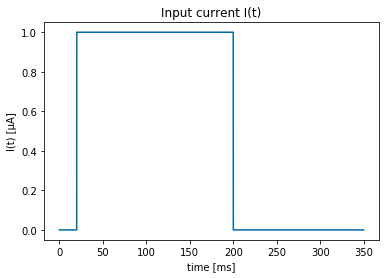

In [27]:
# Enter your code below

#######################
##   Q1a solution   ##
#######################

dt = 0.01 # ms
t = np.arange(0, 350, dt) # ms
I = ((20 <= t)*(t < 200)) # µA

fig, ax = plt.subplots()
ax.plot(t, I)

ax.set_title('Input current I(t)')
ax.set_ylabel('I(t) [µA]')
ax.set_xlabel('time [ms]')
plt.show()

In [37]:
# Enter your code below

# Hint: be careful with the units, R_m in GOhm!

#######################
##   Q1b solution   ##
#######################

# parameters
tau_m = 5 #ms
R_m = 0.500 #GOhm
u_rest = -70 #mV
u_reset = -51 #mV
v_rheobase = -50 #mV
delta_T = 2 #mV
a = 0.5 #nS
tau_w = 100 #ms
b = 7 #pA

def adex(u_0, w_0, I_input):
    # initialize arrays
    N = len(I_input)
    u = np.zeros(N)
    w = np.zeros(N)
    # delta_us = np.zeros(N)
    # delta_ws = np.zeros(N)

    u[0], w[0] = u_0, w_0
    spike_idx = []

    # update equations
    for i in range(N-1):
        u[i+1] = u[i] + dt/tau_m*(u_rest-u[i]+delta_T*np.exp((u[i]-v_rheobase)/delta_T)-R_m*w[i]+R_m*I_input[i])

        w[i+1] = w[i] + dt/tau_w*(a*(u[i]-u_rest)-w[i])
        
        if (u[i] > v_rheobase):
            u[i+1] = u_reset
            w[i+1] += b
            spike_idx.append(i)
        
    delta_us = (u_rest-u+delta_T*np.exp((u-v_rheobase)/delta_T)-R_m*w+R_m*I_input)/tau_m
    delta_ws = (a*(u-u_rest)-w)/tau_w
    delta_ws[spike_idx] += b

    # construct spike_times
    spike_times = np.array(spike_idx)*dt        

    return u, w, delta_us, delta_ws, spike_times


the timepoints when a spike has occured are: [ 24.7   25.17  25.86  27.13  33.32  66.97 100.13 133.3  166.48 199.65] ms


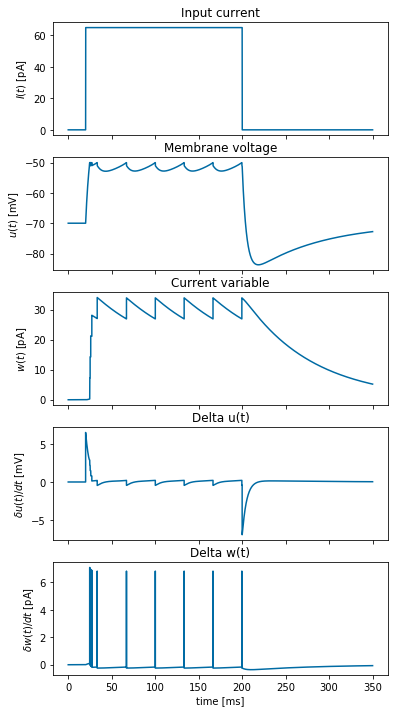

In [38]:
# Enter your code below

#############################
##   Q1c solution plots   ##
#############################
u, w, delta_us, delta_ws, spike_times = adex(-70, 0, I*65) # I is in pA
print('the timepoints when a spike has occured are: {} ms'.format(spike_times))

fig, axs = plt.subplots(5,1, figsize=(6,12), sharex=True)
axs[0].plot(t, I*65)
axs[1].plot(t, u)
axs[2].plot(t, w)
axs[3].plot(t, delta_us)
axs[4].plot(t, delta_ws)

axs[0].set_title('Input current')
axs[1].set_title('Membrane voltage')
axs[2].set_title('Current variable')
axs[3].set_title('Delta u(t)')
axs[4].set_title('Delta w(t)')

axs[0].set_ylabel('$I(t)$ [pA]')
axs[1].set_ylabel('$u(t)$ [mV]')
axs[2].set_ylabel('$w(t)$ [pA]')
axs[3].set_ylabel('$\delta u(t)/dt$ [mV]')
axs[4].set_ylabel('$\delta w(t)/dt$ [pA]')
axs[4].set_xlabel('time [ms]')

plt.show()

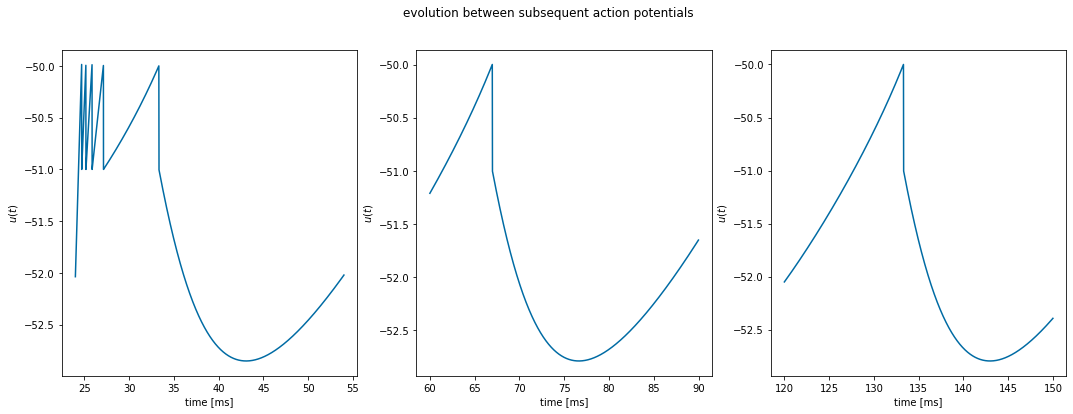

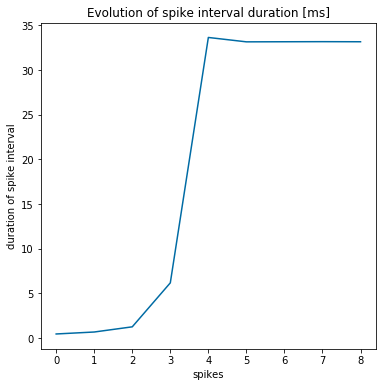

In [55]:
# Enter your answer below

###########################
##   Q1d solution ISI   ##
###########################
fig, axs = plt.subplots(1,3, figsize=(18,6))
axs[0].plot(t[2400:5400], u[2400:5400])
axs[0].set_xlabel('time [ms]')
axs[0].set_ylabel('$u(t)$')

axs[1].plot(t[6000:9000], u[6000:9000])
axs[1].set_xlabel('time [ms]')
axs[1].set_ylabel('$u(t)$')

axs[2].plot(t[12000:15000], u[12000:15000])
axs[2].set_xlabel('time [ms]')
axs[2].set_ylabel('$u(t)$')

plt.suptitle('evolution between subsequent action potentials')
plt.show()

fig, axs = plt.subplots(1,1, figsize=(6,6))
axs.plot(spike_times[1:]-spike_times[:-1])
axs.set_xlabel('spikes')
axs.set_ylabel('duration of spike interval')
axs.set_title('Evolution of spike interval duration [ms]')
plt.show()

<div class="alert alert-success">
<span style="color:black">

**A1 conclusion:** 

\begin{tcolorbox}[colback=green!5]
    
On the figure of the membrane voltage, one can see that when no input current is present the membrane remains at the resting potential (-70 mV). When the input current is switched on at 20 ms the neuronal membrane potential rises. After the threshold of -50 mV the membrane is reset (as is described in the theoretical chapter) to a reset value of -51 mV ($u_{reset}$), the potential starts to rise again to the threshold value. After the input current is switched off the potential drops again to its resting potential.

In this simulation with the chosen parameter values, there is a rapid increase in the potential. This induces a rapid spiking pattern in the first milliseconds of the input current. It is apparent that the the longer the input current is active the lower the spiking frequency of the membrane potential is and thus the longer the duration of the spike interval is. This is a concequence of the rising influence of the current variable (w) and the term -R_m*w. This causes the membrane potential to rise slower as the value of w becomes larger. This is also visible on the figures above. On the first plot (in the begining of the input current) there is rapid spiking (high spiking frequency). At the halfway point of the input current the spiking frequency is lower. Just before the input current switches of the spiking frequency has dropped even more.
    
\end{tcolorbox}
    
</span>

## 2 BRIAN Library - I&F models

### Import

In [7]:
%matplotlib inline
import brian2 as b2
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory
from neurodynex3.adex_model import AdEx

### A2.1 Exponential Integrate and Fire <a id="A2.1"/>
* [Go back to Q2.1](#Q2.1)

nr of spikes: 11


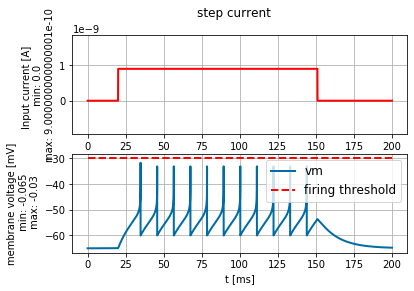

In [8]:
#insert your code here: 

######################
##   Q2.1 solution  ##
######################
# default values.
MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
V_REST = -65.0 * b2.mV
V_RESET = -60.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

I = input_factory.get_step_current(20, 150, b2.ms, 0.9*b2.nA)
simulation_duration = 200 * b2.ms
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))


<div class="alert alert-success">
<span style="color:black">

**A2.1 conclusion:** 
    
\begin{tcolorbox}[colback=green!5]
    
On this figure we see a simular behaviour as above: the potential starts at resting potential and spikes repetitively when reaching the firing threshold. After the input current is switched of a the potential drops again to the resting potential.

In this simulation there are 11 spikes.


    
\end{tcolorbox}
    
</span>

### A2.2 Adaptive Exponential I&F - BRIAN <a id="A2.2"/>
* [Go back to Q2.2](#Q2.2)

nr of spikes: 13


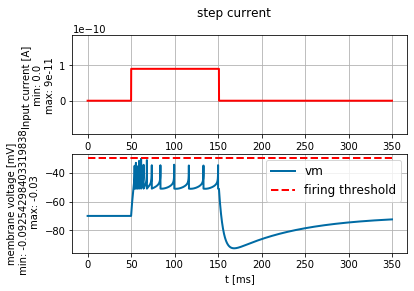

In [9]:
# Enter your code here

######################
##   Q2.2 solution  ##
######################
# default values. (see Table 6.1, Initial Burst)
# http://neuronaldynamics.epfl.ch/online/Ch6.S2.html#Ch6.F3
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
MEMBRANE_RESISTANCE_R = 500 * b2.Mohm
V_REST = -70.0 * b2.mV
V_RESET = -51.0 * b2.mV
RHEOBASE_THRESHOLD_v_rh = -50.0 * b2.mV
SHARPNESS_delta_T = 2.0 * b2.mV
ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA

# a technical threshold to tell the algorithm when to reset vm to v_reset
FIRING_THRESHOLD_v_spike = -30. * b2.mV

I = input_factory.get_step_current(50, 150, b2.ms, 90*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))


### A2.3 Characteristics <a id="A2.3"/>
* [Go back to Q2.3](#Q2.3)

In [10]:
# Enter your answer here

######################
##   Q2.3 solution  ##
######################


<div class="alert alert-success">
<span style="color:black">

**A2.2 and A2.3 answer:** 
    
\begin{tcolorbox}[colback=green!5]

The AdEx model has the following characteristics:
- It takes into account the complex dynamics of ion channels and synaptic currents in neurons and produces realistic spiking patterns. 
- Exponential decay: The model has an exponential decay of the membrane potential, which provides a realistic approximation of the membrane's passive properties.
- Adaptation current: The model includes an adaptation current that reflects the history of spiking activity of the neuron. The adaptation current causes the threshold to increase, resulting in a decrease in the firing rate over time.
    
There are 2 more spikes in the simulation with the AdEx model compaired to the non adaptive (13 instead of 11, this comparison is irrelavent since the acitive time of the input current is different). With the adaptive model there is faster spiking in the begining when comparing to the non-adaptive model. In the adaptive model the spiking frequency drops. In the non-Adaptive model the spiking frequency remains constant. 
    
\end{tcolorbox}
    
</span>

## 3 Firing Pattern

### A3 Simulate all patterns <a id="A3"/>
* [Go back to Q3](#Q3)

nr of spikes: 4


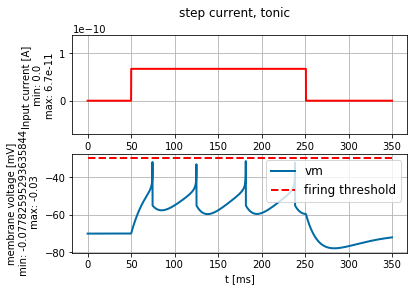

In [11]:
# Enter your code below

####################
##   Q3 solution  ##
####################

# Tonic
MEMBRANE_TIME_SCALE_tau_m = 20 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 0.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 30.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 60.0 * b2.pA
V_RESET = -55.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, tonic",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 9


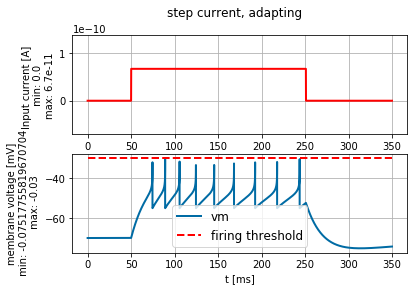

In [12]:
#Adapting
MEMBRANE_TIME_SCALE_tau_m = 20 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 0.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 5.0 * b2.pA
V_RESET = -55.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, adapting",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 10


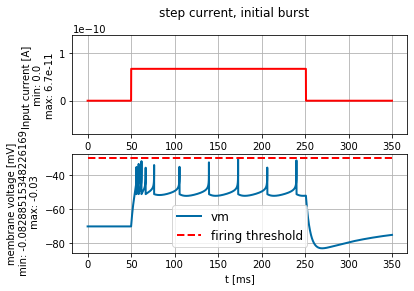

In [13]:
#Initial burst
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -51.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, initial burst",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 20


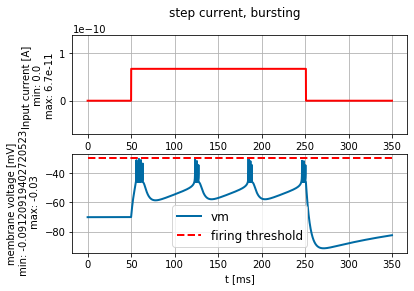

In [14]:
#Bursting
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -46.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, bursting",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 18


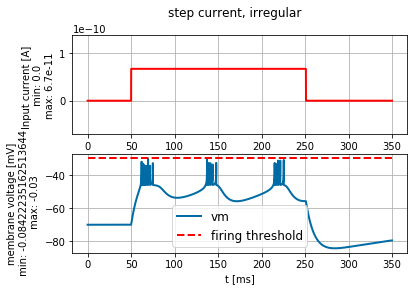

In [15]:
#Irregular
MEMBRANE_TIME_SCALE_tau_m = 9.9 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = -0.5 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 7.0 * b2.pA
V_RESET = -46.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, irregular",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 5


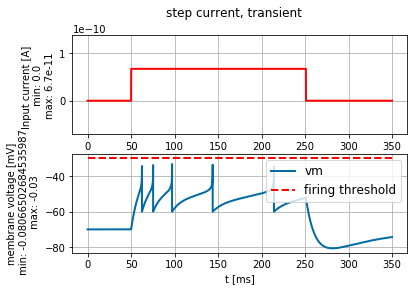

In [16]:
#Transient
MEMBRANE_TIME_SCALE_tau_m = 10 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = 1.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 10.0 * b2.pA
V_RESET = -60.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA)
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, transient",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 12


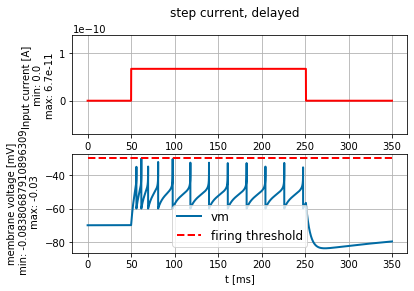

In [17]:
#Delayed
MEMBRANE_TIME_SCALE_tau_m = 5 * b2.ms
ADAPTATION_VOLTAGE_COUPLING_a = -1.0 * b2.nS
ADAPTATION_TIME_CONSTANT_tau_w = 100.0 * b2.ms
SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b = 10.0 * b2.pA
V_RESET = -60.0 * b2.mV

I = input_factory.get_step_current(50, 250, b2.ms, 67*b2.pA) # or 25pA
simulation_duration = 350 * b2.ms
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(
        tau_m=MEMBRANE_TIME_SCALE_tau_m,
        v_reset=V_RESET,
        a=ADAPTATION_VOLTAGE_COUPLING_a,
        b=SPIKE_TRIGGERED_ADAPTATION_INCREMENT_b,
        tau_w=ADAPTATION_TIME_CONSTANT_tau_w,
        I_stim=I, simulation_time=simulation_duration)
plot_tools.plot_voltage_and_current_traces(
    state_monitor, I,title="step current, delayed",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 4 Phase plane and Nullclines

### Import <a id="P4_import"/>

In [18]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

### A4.1 Run AdEx <a id="A4.1"/>
* [Go back to Q4.1](#Q4.1)

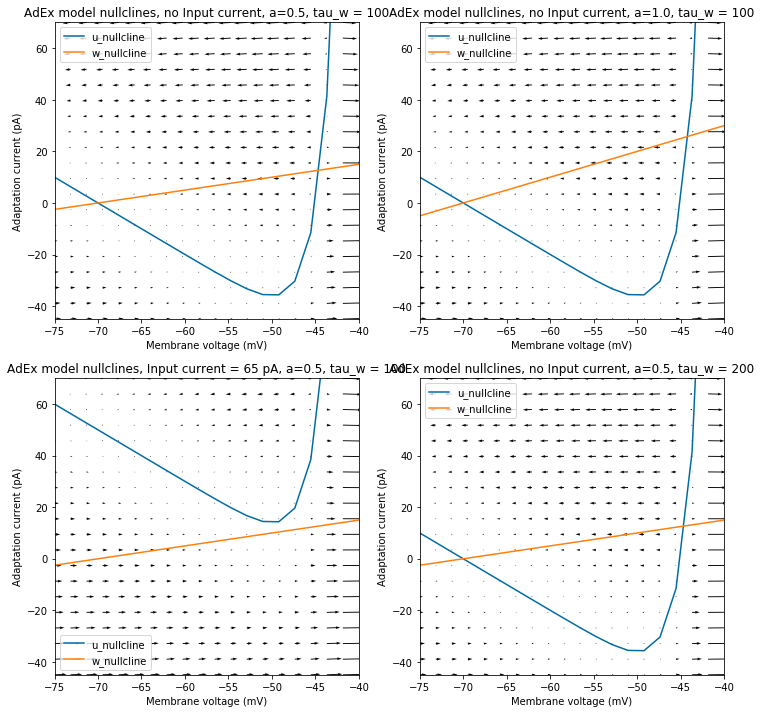

In [76]:
# Enter your code here: 

####################
##   Q4.1a solution  ##
####################
I = ((20 <= t)*(t < 200))*65 # pA
# Define AdEx model parameters
# parameters
tau_m = 5 #ms
R_m = 0.500 #GOhm
u_rest = -70 #mV
u_reset = -51 #mV
v_rheobase = -50 #mV
delta_T = 2 #mV
a = 0.5 #nS
tau_w = 100 #ms
b = 7 #pA



# Define nullcline functions for v and w
def u_dt(u, w, I):
    return (-(u-u_rest) + delta_T * np.exp((u - v_rheobase)/delta_T) - R_m * w + R_m * I) / tau_m

def w_dt(u, w, a, tau_w):
    return (a * (u - u_rest) - w) / tau_w

# formulas come from https://www.frontiersin.org/articles/10.3389/fncom.2012.00062/full
def u_nullcline(u, w, I):
    return -1/R_m*(u-u_rest)+ 1/R_m*delta_T*np.exp((u-v_rheobase)/delta_T)+I
    
def w_nullcline(u, w, a):
    return a*(u-u_rest)



# Define plotting parameters
u_min, u_max = -75, -40  # voltage limits (mV)
w_min, w_max = -45, 70  # adaptation current limits (pA)
N = 20  # number of grid points for quiver plot

# Create meshgrid for v and w
u_vals = np.linspace(u_min, u_max, N)
w_vals = np.linspace(w_min, w_max, N)
u_grid, w_grid = np.meshgrid(u_vals, w_vals)
# Compute nullclines on meshgrid
# no current, a=0.5 nS and tau_w=100 ms
u_nc_1 = u_nullcline(u_vals, w_vals, 0)
w_nc_1 = w_nullcline(u_vals, w_vals, 0.5)

u_delta_1 = u_dt(u_grid, w_grid, 0)
w_delta_1 = w_dt(u_grid, w_grid, 0.5, 100)

# no current, a=1 nS and tau_w=100 ms
u_nc_2 = u_nullcline(u_vals, w_vals, 0)
w_nc_2 = w_nullcline(u_vals, w_vals, 1.0)

u_delta_2 = u_dt(u_grid, w_grid, 0)
w_delta_2 = w_dt(u_grid, w_grid, 1.0, 100)

# constant current of 50pA, a=0.5 nS and tau_w=100 ms
u_nc_3 = u_nullcline(u_vals, w_vals, 50)
w_nc_3 = w_nullcline(u_vals, w_vals, 0.5)

u_delta_3 = u_dt(u_grid, w_grid, 50)
w_delta_3 = w_dt(u_grid, w_grid, 0.5, 100)

# no current, a=0.5 nS and tau_w=200 ms
u_nc_4 = u_nullcline(u_vals, w_vals, 0)
w_nc_4 = w_nullcline(u_vals, w_vals, 0.5)

u_delta_4 = u_dt(u_grid, w_grid, 0)
w_delta_4 = w_dt(u_grid, w_grid, 0.5, 200)


# Create quiver plot of nullclines
fig, ax = plt.subplots(2,2,figsize=(12, 12))
ax[0,0].quiver(u_grid, w_grid, u_delta_1, w_delta_1)
ax[0,0].plot(u_vals, u_nc_1, label='u_nullcline')
ax[0,0].plot(u_vals, w_nc_1, label='w_nullcline')

ax[0,0].set_xlabel('Membrane voltage (mV)')
ax[0,0].set_ylabel('Adaptation current (pA)')
ax[0,0].set_xlim(u_min, u_max)
ax[0,0].set_ylim(w_min, w_max)
ax[0,0].set_title('AdEx model nullclines, no Input current, a=0.5, tau_w = 100')
ax[0,0].legend()



ax[0,1].quiver(u_grid, w_grid, u_delta_2, w_delta_2)
ax[0,1].plot(u_vals, u_nc_2, label='u_nullcline')
ax[0,1].plot(u_vals, w_nc_2, label='w_nullcline')

ax[0,1].set_xlabel('Membrane voltage (mV)')
ax[0,1].set_ylabel('Adaptation current (pA)')
ax[0,1].set_xlim(u_min, u_max)
ax[0,1].set_ylim(w_min, w_max)
ax[0,1].set_title('AdEx model nullclines, no Input current, a=1.0, tau_w = 100')
ax[0,1].legend()



ax[1,0].quiver(u_grid, w_grid, u_delta_3, w_delta_3)
ax[1,0].plot(u_vals, u_nc_3, label='u_nullcline')
ax[1,0].plot(u_vals, w_nc_3, label='w_nullcline')

ax[1,0].set_xlabel('Membrane voltage (mV)')
ax[1,0].set_ylabel('Adaptation current (pA)')
ax[1,0].set_xlim(u_min, u_max)
ax[1,0].set_ylim(w_min, w_max)
ax[1,0].set_title('AdEx model nullclines, Input current = 65 pA, a=0.5, tau_w = 100')
ax[1,0].legend()


ax[1,1].quiver(u_grid, w_grid, u_delta_4, w_delta_4)
ax[1,1].plot(u_vals, u_nc_4, label='u_nullcline')
ax[1,1].plot(u_vals, w_nc_4, label='w_nullcline')

ax[1,1].set_xlabel('Membrane voltage (mV)')
ax[1,1].set_ylabel('Adaptation current (pA)')
ax[1,1].set_xlim(u_min, u_max)
ax[1,1].set_ylim(w_min, w_max)
ax[1,1].set_title('AdEx model nullclines, no Input current, a=0.5, tau_w = 200')
ax[1,1].legend()
plt.show()

In [20]:
# Enter your code here

###############################
##   Q4.1b solution nullclines  ##
###############################


<div class="alert alert-success">
<span style="color:black">

**4.1 Answer:** 
    
\begin{tcolorbox}[colback=green!5]
    
1. a is the parameter used to tune the adaptation current. The bigger a, the faster the adaptation current will act and the more steep the w nullcline will be.
2. adding a input current will shift the u nullcline upwards.
3. the b parameter is the spike trigger current. If b is small the time interval between 2 spikes will be shorter.
4. The arrows ore more horizontal for bigger values of tau_w
    
\end{tcolorbox}
    
</span>

### A4.2 Predict firing pattern <a id="A4.2">
* [Go back to Q4.2](#Q4.2)

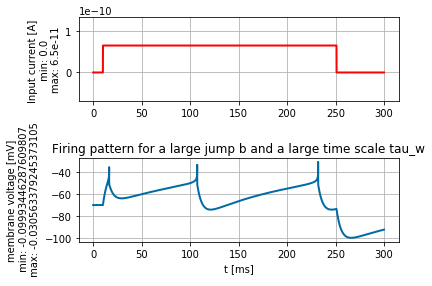

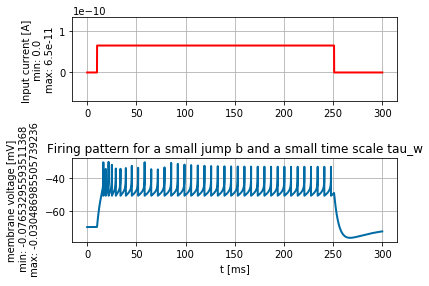

In [77]:
# Enter your code here

#################################
##   Q4.2 solution nullclines  ##
#################################
input_current = input_factory.get_step_current(10, 250, 1*b2.ms, 65*b2.pA)
state_monitor_A, spike_monitor_A = AdEx.simulate_AdEx_neuron(I_stim=input_current, simulation_time=300*b2.ms, a=0.01*b2.nS, b=60*b2.pA, tau_w=100*b2.ms)
plt.figure()
plot_tools.plot_voltage_and_current_traces(state_monitor_A, input_current)
plt.title('Firing pattern for a large jump b and a large time scale tau_w')
plt.tight_layout()
plt.show()
plt.figure()
state_monitor_B, spike_monitor_A = AdEx.simulate_AdEx_neuron(I_stim=input_current, simulation_time=300*b2.ms, a=0.01*b2.nS, b=5*b2.pA, tau_w=30*b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor_B, input_current)
plt.title('Firing pattern for a small jump b and a small time scale tau_w')
plt.tight_layout()
plt.show()


<div class="alert alert-success">
<span style="color:black">

**4.2 Answer:** 

\begin{tcolorbox}[colback=green!5]
    
A smaller a value results in a more horizontal w nullcline. This is thus small coupling between the adaptation current and the membrande voltage.

A large jump b will result in a larger time interval between spikes. The firing rate will be lower. Incresing tau_w will result in a larger undershoot (larger detour in the phase diagram). These effects are visible in the figurs above.
    
\end{tcolorbox}
    
</span>